### 변수 설명

- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
	['Commercial associate', 'Working', 'State servant'(공무원), 'Pensioner'(연금), 'Student']

- edu_type: 교육 수준
	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부
	['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식
	['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일
	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화(가정용) 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
=> 낮을 수록 높은 신용의 신용카드 사용자 의미함

	

In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
""
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.getcwd()

'C:\\Users\\seohyun\\OneDrive - 동국대학교\\python\\비어플\\프로젝트_신용카드연체'

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [4]:
train = train.drop('index', axis=1)
test = test.drop('index', axis = 1)

In [5]:
train.shape

(26457, 19)

In [6]:
test.shape

(10000, 18)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [8]:
# 중복행 확인 -> 같은 사람이 카드를 여러개 만들었을 수도 있으므로 제거는 하지 않음
train[train.duplicated() == True]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,1,0,0,0,NaN,2.0,-35.0,2.0
1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,-29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0
26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


#### 결측치 확인

In [9]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [10]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

## 데이터 전처리

#### - 의미 없는 변수 제거

In [11]:
# flag_mobil 모두 1 => drop
train = train.drop('FLAG_MOBIL', axis=1)
test = test.drop('FLAG_MOBIL', axis = 1)

#### - 변수변환

##### days birth, days employed, begin_month 양수로 변환

In [12]:
# days employed > 0 => 0 
# days employed <0 => 양수값으로
# days birth & begin month 음수값 => 양수값으로 변환
train['DAYS_EMPLOYED'] = [0 if d > 0 else abs(d) for d in train['DAYS_EMPLOYED']]
train['DAYS_BIRTH'] = [abs(d) for d in train['DAYS_BIRTH']]
train['begin_month'] = [abs(d) for d in train['begin_month']]

In [13]:
# test data
test['DAYS_EMPLOYED'] = [0 if d > 0 else abs(d) for d in test['DAYS_EMPLOYED']]

#음수값->양수값으로 변환
test['DAYS_BIRTH'] = [abs(d) for d in test['DAYS_BIRTH']]
test['begin_month'] = [abs(d) for d in test['begin_month']]

### (1) 결측치 처리

In [14]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [15]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

-> 직업종류에 결측치 존재. 두가지 경우가 있을 수 있음
1) 직업 없음
2) 직업 있는데 결측치


직업 있는데 결측치인 사람
== 직업 있으면 days_emoloyed 양수

In [16]:
 # 직업 결측치, 고용된 지 최소 하루 이상 = 직업 있는 사람
train[ ((train['occyp_type'].isnull()) & (train['DAYS_EMPLOYED'] > 0)) ]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,15131,1466,0,0,1,NaN,3.0,38.0,2.0
19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,13727,6031,0,0,0,NaN,2.0,7.0,2.0
20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,19850,1753,0,1,0,NaN,2.0,35.0,2.0
23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,14542,444,1,1,1,NaN,2.0,18.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,F,Y,N,0,121500.0,State servant,Higher education,Married,House / apartment,19912,4973,0,1,0,NaN,2.0,31.0,2.0
26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,19691,473,0,0,0,NaN,2.0,40.0,2.0
26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,13015,3647,0,0,0,NaN,2.0,13.0,2.0
26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,10498,2418,1,1,0,NaN,2.0,2.0,1.0


In [17]:
# 결측치, days employed = 0 -> 무직자
train[(train['occyp_type'].isnull()) & (train['DAYS_EMPLOYED'] == 0) ]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22922,0,0,1,0,NaN,1.0,41.0,2.0
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23113,0,0,0,0,NaN,2.0,37.0,2.0
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,21253,0,0,1,0,NaN,2.0,7.0,2.0
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22361,0,0,1,0,NaN,1.0,5.0,2.0
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21100,0,0,1,0,NaN,1.0,24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21151,0,0,0,1,NaN,1.0,60.0,1.0
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,22314,0,0,1,0,NaN,2.0,17.0,1.0
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,19238,0,0,0,0,NaN,2.0,57.0,2.0
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,24129,0,0,0,0,NaN,1.0,43.0,2.0


- 무직자 => unemp로 결측치 채우기
- 직업 있는데 결측치인 사람 => 머신러닝으로

##### - 무직자

In [18]:
# train data
train.loc[(train['occyp_type'].isnull()) & (train['DAYS_EMPLOYED']==0) , 'occyp_type'] = 'unemp'

In [19]:
# test data
test.loc[(test['occyp_type'].isnull()) & (test['DAYS_EMPLOYED']==0) , 'occyp_type'] = 'unemp'

In [20]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3733
family_size         0
begin_month         0
credit              0
dtype: int64

In [21]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       1455
family_size         0
begin_month         0
dtype: int64

##### - 직업 있는데 결측치인 데이터 처리 ( random forest)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     22724 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

In [23]:
# 범주형데이터 수치형으로 전환
train['gender'] = train['gender'].replace(['F','M'],[0,1])
train['car'] = train['car'].replace(['N','Y'],[0,1])
train['reality'] = train['reality'].replace(['N','Y'],[0,1])

# edu type은 순서형으로 간주됨
train['edu_type'] = train['edu_type'].replace(['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
                                             , [0,1,2,3,4])

train = train.astype({'credit': 'object'})

In [24]:
train_notna_cat = train[train['occyp_type'].notnull()]
train_na_cat = train[train['occyp_type'].isnull() ]

In [25]:
train2 = train

In [26]:
change_list = ['income_type', 'family_type', 'house_type']
for col in change_list:
    le = LabelEncoder()
    train2[col] = le.fit_transform(train2[col])

In [27]:
train_notna = train2[train2['occyp_type'].notnull()]
train_notna_cred=train_notna['credit']
train_notna = train_notna.drop('credit', axis=1)

train_na = train2[train2['occyp_type'].isnull()]
train_na_cred = train_na['credit']
train_na = train_na.drop(['occyp_type', 'credit'], axis=1)

In [28]:
train_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22724 entries, 1 to 26456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         22724 non-null  int64  
 1   car            22724 non-null  int64  
 2   reality        22724 non-null  int64  
 3   child_num      22724 non-null  int64  
 4   income_total   22724 non-null  float64
 5   income_type    22724 non-null  int32  
 6   edu_type       22724 non-null  int64  
 7   family_type    22724 non-null  int32  
 8   house_type     22724 non-null  int32  
 9   DAYS_BIRTH     22724 non-null  int64  
 10  DAYS_EMPLOYED  22724 non-null  int64  
 11  work_phone     22724 non-null  int64  
 12  phone          22724 non-null  int64  
 13  email          22724 non-null  int64  
 14  occyp_type     22724 non-null  object 
 15  family_size    22724 non-null  float64
 16  begin_month    22724 non-null  float64
dtypes: float64(3), int32(3), int64(10), object(1)
memo

예측

In [29]:
train_notna_feat = train_notna.drop('occyp_type', axis=1)
train_notna_lab = train_notna['occyp_type']

x_train1, x_test1, y_train1, y_test1  = train_test_split(train_notna_feat, train_notna_lab, test_size=0.2)

model1 = RandomForestClassifier(random_state = 0)
model1.fit(x_train1, y_train1)
print(model1.score(x_train1, y_train1))
print(model1.score(x_test1, y_test1))

#train_na_result = model1.predict(train_na)

1.0
0.9027502750275027


 train set 정확도 1 나옴 => 과대 적합으로 추정됨 -> max_depth 설정해줌

In [30]:
train_notna_feat = train_notna.drop('occyp_type', axis=1)
train_notna_lab = train_notna['occyp_type']

x_train1, x_test1, y_train1, y_test1  = train_test_split(train_notna_feat, train_notna_lab, test_size=0.2)

model1 = RandomForestClassifier(random_state = 0, max_depth =15)
model1.fit(x_train1, y_train1)
print(model1.score(x_train1, y_train1))
print(model1.score(x_test1, y_test1))

train_na_result = model1.predict(train_na)

0.9260685406237967
0.8292629262926292


In [31]:
# 데이터 합치기
train_na['occyp_type'] = train_na_result

In [32]:
train_notna['income_type'] = train_notna_cat['income_type']
train_notna['edu_type'] = train_notna_cat['edu_type']
train_notna['family_type'] = train_notna_cat['family_type']
train_notna['house_type'] = train_notna_cat['house_type']
train_notna['credit'] = train_notna_cred

train_na['income_type'] = train_na_cat['income_type']
train_na['edu_type'] = train_na_cat['edu_type']
train_na['family_type'] = train_na_cat['family_type']
train_na['house_type'] = train_na_cat['house_type']
train_na['credit'] = train_na_cred

In [33]:
train = pd.concat([train_notna,train_na])

train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,0,0,1,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0
2,1,1,1,0,450000.0,Working,0,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
3,0,0,1,0,202500.0,Commercial associate,1,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0
4,0,1,1,0,157500.0,State servant,0,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0
5,0,0,1,2,270000.0,Working,1,Married,House / apartment,13413,4996,0,0,1,High skill tech staff,4.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,0,1,0,0,121500.0,State servant,0,Married,House / apartment,19912,4973,0,1,0,Core staff,2.0,31.0,2.0
26435,0,0,0,1,126000.0,Working,1,Widow,House / apartment,19691,473,0,0,0,Sales staff,2.0,40.0,2.0
26437,1,0,1,0,180000.0,Working,1,Married,House / apartment,13015,3647,0,0,0,Laborers,2.0,13.0,2.0
26449,0,0,0,0,90000.0,Working,1,Married,House / apartment,10498,2418,1,1,0,Sales staff,2.0,2.0,1.0


In [34]:
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

=> 모두 채워졌는지 확인

##### test data

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  work_phone     10000 non-null  int64  
 12  phone          10000 non-null  int64  
 13  email          10000 non-null  int64  
 14  occyp_type     8545 non-null   object 
 15  family_size    10000 non-null  float64
 16  begin_month    10000 non-null  float64
dtypes: float64(3), int64(6), object(8)
memory usage: 1.

In [36]:
# 범주형데이터 수치형으로 전환
test['gender'] = test['gender'].replace(['F','M'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])

# edu type은 순서형으로 간주됨
test['edu_type'] = test['edu_type'].replace(['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
                                             , [0,1,2,3,4])

In [37]:
test_notna_cat = test[test['occyp_type'].notnull()]
test_na_cat = test[test['occyp_type'].isnull() ]

In [38]:
test2 = test

In [39]:
change_list = [ 'income_type', 'family_type', 'house_type']
for col in change_list:
    le = LabelEncoder()
    test2[col] = le.fit_transform(test2[col])

In [40]:
test_notna = test2[test2['occyp_type'].notnull()]


test_na = test2[test2['occyp_type'].isnull()]
test_na = test_na.drop(['occyp_type'], axis=1)

예측

In [41]:
test_notna_feat = test_notna.drop('occyp_type', axis=1)
test_notna_lab = test_notna['occyp_type']

x_train, x_test, y_train, y_test  = train_test_split(test_notna_feat, test_notna_lab, test_size=0.2)

model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

test_na_result = model.predict(test_na)

1.0
0.7981275599765945


 train set 정확도 1 나옴 => 과대 적합으로 추정됨 -> max_depth 설정해줌

In [42]:
test_notna_feat = test_notna.drop('occyp_type', axis=1)
test_notna_lab = test_notna['occyp_type']

x_train, x_test, y_train, y_test  = train_test_split(test_notna_feat, test_notna_lab, test_size=0.2)

model = RandomForestClassifier(random_state = 0, max_depth = 15)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

test_na_result = model.predict(test_na)

0.9584552369806905
0.719133996489175


In [43]:
# 데이터 합치기
test_na['occyp_type'] = test_na_result

In [44]:
test_notna['income_type'] = test_notna_cat['income_type']
test_notna['edu_type'] = test_notna_cat['edu_type']
test_notna['family_type'] = test_notna_cat['family_type']
test_notna['house_type'] = test_notna_cat['house_type']

test_na['income_type'] = test_na_cat['income_type']
test_na['edu_type'] = test_na_cat['edu_type']
test_na['family_type'] = test_na_cat['family_type']
test_na['house_type'] = test_na_cat['house_type']

<ipython-input-44-b9b36e29746f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_notna['income_type'] = test_notna_cat['income_type']
<ipython-input-44-b9b36e29746f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_notna['edu_type'] = test_notna_cat['edu_type']
<ipython-input-44-b9b36e29746f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [45]:
test = pd.concat([test_notna,test_na])

test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,1,0,0,112500.0,Pensioner,1,Civil marriage,House / apartment,21990,0,0,1,0,unemp,2.0,60.0
1,0,0,1,0,135000.0,State servant,0,Married,House / apartment,18964,8671,0,1,0,Core staff,2.0,36.0
2,0,0,1,0,69372.0,Working,1,Married,House / apartment,15887,217,1,1,0,Laborers,2.0,40.0
3,1,1,0,0,112500.0,Commercial associate,1,Married,House / apartment,19270,2531,1,0,0,Drivers,2.0,41.0
4,0,1,1,0,225000.0,State servant,0,Married,House / apartment,17822,9385,1,0,0,Managers,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,0,0,0,1,202500.0,Working,0,Married,Municipal apartment,12131,793,0,0,0,Sales staff,3.0,23.0
9976,1,0,1,0,225000.0,Working,3,Married,Municipal apartment,10565,811,1,1,0,Laborers,2.0,20.0
9985,1,1,1,2,211500.0,Working,1,Married,House / apartment,10435,2987,0,0,0,Laborers,4.0,19.0
9990,0,0,1,0,157500.0,Working,1,Separated,House / apartment,18148,8376,0,0,0,Medicine staff,1.0,14.0


In [46]:
test.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
dtype: int64

In [47]:
train.to_csv('train2.csv',header=True,index=False)
test.to_csv('test2.csv',header=True,index=False)

### (2) 이상치 처리

In [48]:
train=pd.read_csv('train2.csv')
test=pd.read_csv('test2.csv')
submission=pd.read_csv('sample_submission.csv')

#### - 이산형
child_num, family_size

C:\Users\seohyun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seohyun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


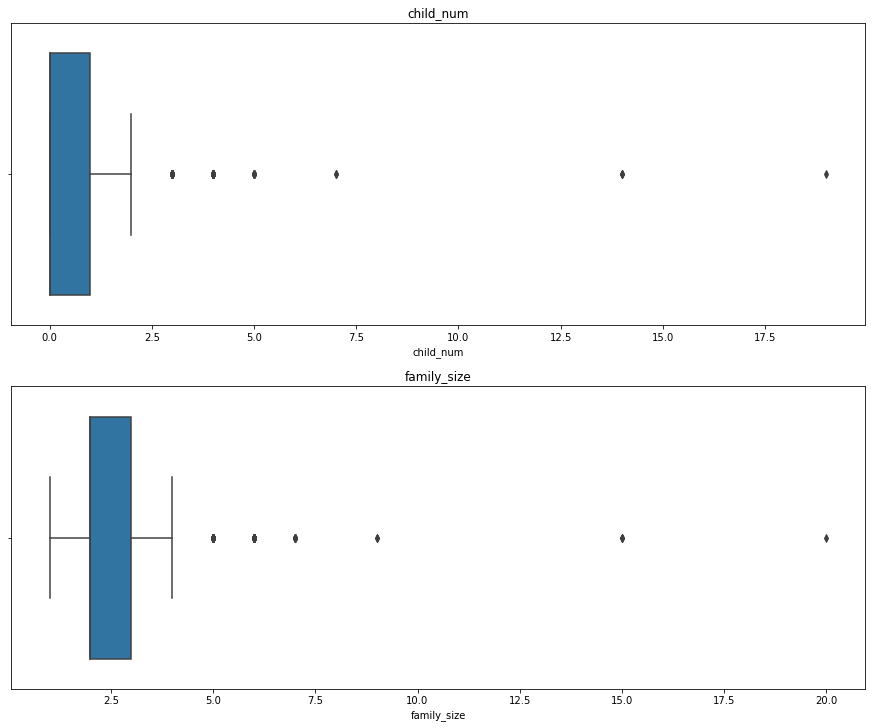

In [49]:
train_num = ['child_num','family_size']
f, ax = plt.subplots(2, figsize=(12,10), constrained_layout=True)
# j = [0, 0]
k = [0, 1]
for i, k in zip(train_num, k):
    sns.boxplot(train[i], ax = ax[k])
    ax[k].title.set_text(i)
    plt.rc('font', family = 'Malgun Gothic')
    plt.rc('axes', unicode_minus = False)

##### - family size, child num 이상치 처리
 (박스플롯에서 떨어진 부분(?)을 기준으로)
- train data

In [50]:
train[train['family_size']>=10]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
7213,1,1,1,14,225000.0,Working,1,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,7.0,2.0
7700,1,1,1,14,225000.0,Working,1,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,58.0,2.0
9184,0,0,1,19,112500.0,Working,1,Single / not married,House / apartment,11057,1853,1,1,0,Waiters/barmen staff,20.0,5.0,2.0
21825,1,1,1,14,225000.0,Working,1,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,43.0,2.0


In [51]:
train[train['child_num']>=8]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
7213,1,1,1,14,225000.0,Working,1,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,7.0,2.0
7700,1,1,1,14,225000.0,Working,1,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,58.0,2.0
9184,0,0,1,19,112500.0,Working,1,Single / not married,House / apartment,11057,1853,1,1,0,Waiters/barmen staff,20.0,5.0,2.0
21825,1,1,1,14,225000.0,Working,1,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,43.0,2.0


In [52]:
i =  train[train['family_size']>=10].index
train=train.drop(i, axis=0)

In [53]:
train[(train['child_num'] - train['family_size']) >= 0]
# 가족 수 < 아이 수 => 말이 안됨. 이상치

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
4975,1,1,1,1,450000.0,Commercial associate,1,Single / not married,House / apartment,18173,678,0,1,1,Core staff,1.0,16.0,2.0
12783,1,1,0,2,225000.0,Working,1,Married,House / apartment,14776,2212,0,0,0,Drivers,1.0,30.0,2.0
13823,0,0,1,1,108000.0,Working,1,Single / not married,House / apartment,12723,1132,1,1,0,Sales staff,1.0,48.0,2.0
14424,0,0,1,1,126000.0,Working,1,Married,House / apartment,12140,779,0,0,0,Core staff,1.0,37.0,2.0
18132,1,0,0,1,157500.0,Working,1,Married,House / apartment,16424,1458,0,0,0,Drivers,1.0,25.0,2.0
25375,1,0,1,1,126000.0,Commercial associate,1,Civil marriage,House / apartment,12755,2105,0,0,0,Laborers,1.0,39.0,2.0


=> drop

In [54]:
i2 = train[(train['child_num'] - train['family_size']) >= 0].index
train = train.drop(i2)

In [55]:
train.shape

(26447, 18)

- test 데이터

In [56]:
test[test['family_size']>=10]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month


In [57]:
test[test['child_num']>10]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month


In [58]:
test[(test['child_num'] - test['family_size']) >= 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
4250,1,1,0,2,180000.0,Commercial associate,1,Married,House / apartment,14452,4249,0,0,0,Drivers,1.0,35.0
7079,1,0,0,1,180000.0,Working,1,Married,House / apartment,10656,926,1,1,0,Laborers,1.0,18.0


In [59]:
i3 = test[(test['child_num'] - test['family_size']) >= 0].index
test = test.drop(i3)

In [60]:
test.shape

(9998, 17)

#### - 연속형

C:\Users\seohyun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seohyun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seohyun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seohyun\anaconda

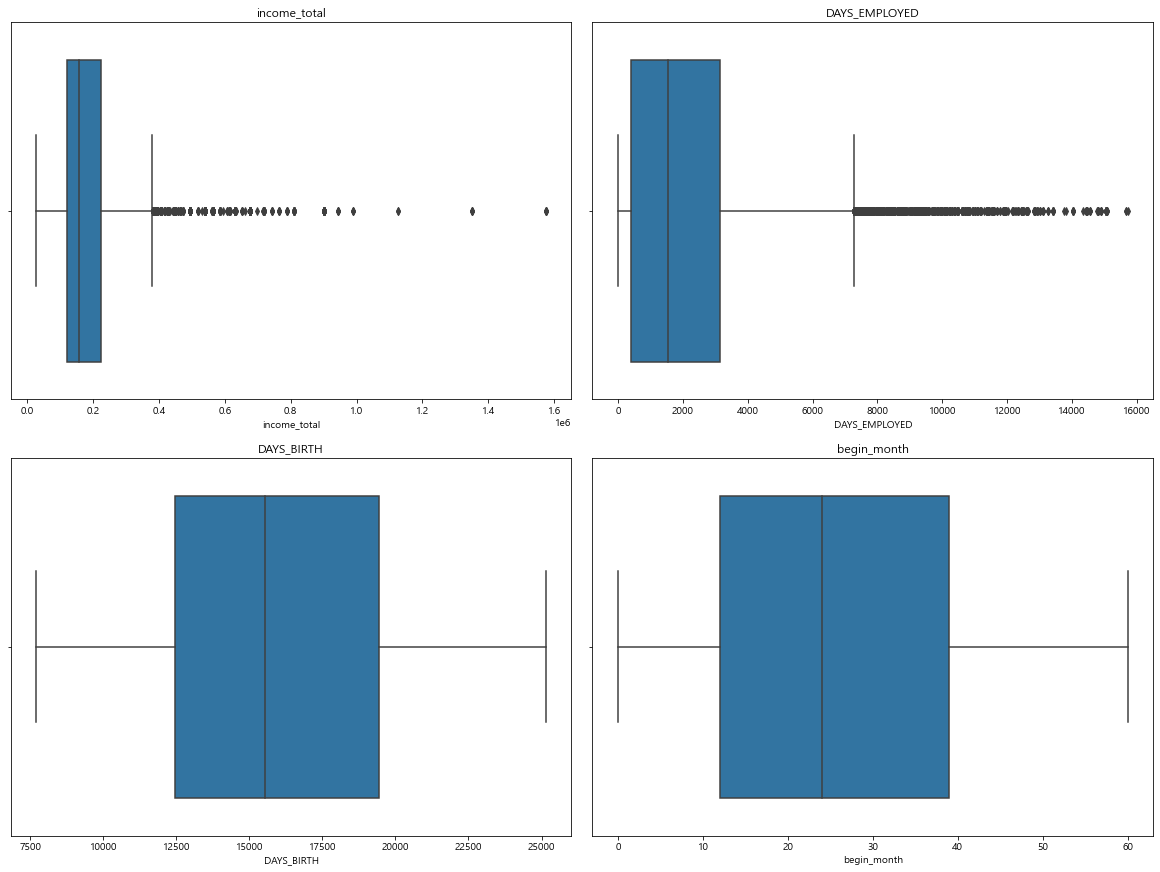

In [61]:
t_num=['income_total','DAYS_EMPLOYED', 'DAYS_BIRTH', 'begin_month']
f,ax=plt.subplots(2,2,figsize=(16,12),constrained_layout=True)
j=[0,0,1,1]
k=[0,1,0,1]
for i,j,k in zip(t_num,j,k):
    sns.boxplot(train[i],ax=ax[j,k])
    ax[j,k].title.set_text(i)
    plt.rc('font', family = 'Malgun Gothic')
    plt.rc('axes', unicode_minus = False)

##### - income total

In [62]:
delta = 6
top = train['income_total'].mean() + delta*train['income_total'].std()

i4 = train[train['income_total'] > top].index
train= train.drop(i4)

In [63]:
top

798582.4982469073

In [63]:
delta = 6
top = test['income_total'].mean() + delta*test['income_total'].std()

i5 = test[test['income_total'] > top].index
test = test.drop(i5)

In [64]:
train.to_csv('train3.csv',header=True,index=False)
test.to_csv('test3.csv',header=True,index=False)

### (3) 중복데이터 처리

In [65]:
train=pd.read_csv('train3.csv')
test=pd.read_csv('test3.csv')
submission=pd.read_csv('sample_submission.csv')

In [66]:
train[train['income_type'] == 'Student'] # 'student'

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2561,0,0,1,0,171000.0,Student,0,Married,House / apartment,18756,3904,0,0,1,Core staff,2.0,60.0,2.0
3076,0,0,1,0,171000.0,Student,0,Married,House / apartment,18756,3904,0,0,1,Core staff,2.0,39.0,1.0
7612,0,0,1,0,171000.0,Student,0,Married,House / apartment,18756,3904,0,0,1,Core staff,2.0,39.0,1.0
9957,0,0,1,1,112500.0,Student,1,Civil marriage,House / apartment,12127,795,0,0,0,Laborers,3.0,12.0,2.0
18581,0,0,1,0,171000.0,Student,0,Married,House / apartment,18756,3904,0,0,1,Core staff,2.0,35.0,1.0
19830,0,0,1,1,112500.0,Student,1,Civil marriage,House / apartment,12127,795,0,0,0,Laborers,3.0,14.0,2.0
23572,1,0,0,0,135000.0,Student,0,Single / not married,With parents,9115,581,0,0,1,Core staff,1.0,14.0,2.0


begin month 제외 모두 같으면 같은 사람으로 간주.
=> 구분할 수 있는 id 생성 (한 사람이 카드를 여러번 만들면 begin month는 다를 수 있음)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26389 entries, 0 to 26388
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26389 non-null  int64  
 1   car            26389 non-null  int64  
 2   reality        26389 non-null  int64  
 3   child_num      26389 non-null  int64  
 4   income_total   26389 non-null  float64
 5   income_type    26389 non-null  object 
 6   edu_type       26389 non-null  int64  
 7   family_type    26389 non-null  object 
 8   house_type     26389 non-null  object 
 9   DAYS_BIRTH     26389 non-null  int64  
 10  DAYS_EMPLOYED  26389 non-null  int64  
 11  work_phone     26389 non-null  int64  
 12  phone          26389 non-null  int64  
 13  email          26389 non-null  int64  
 14  occyp_type     26389 non-null  object 
 15  family_size    26389 non-null  float64
 16  begin_month    26389 non-null  float64
 17  credit         26389 non-null  float64
dtypes: flo

In [68]:
train['id'] = (train['gender'].astype(str)+"_"+train['car'].astype(str)+"_"+train['reality'].astype(str)
               +"_"+train['child_num'].astype(str)+"_"+train['income_total'].astype(str)+"_"+train['income_type']
               +"_"+train['edu_type'].astype('str')+"_"+train['family_type']+"_"+train['house_type']+"_"+train['DAYS_BIRTH'].astype(str)
               +"_"+train['DAYS_EMPLOYED'].astype(str)+"_"+train['work_phone'].astype(str)+"_"+train['phone'].astype(str)
               +"_"+train['email'].astype(str)+"_"+train['occyp_type']+"_"+train["family_size"].astype(str))

=> begin month, credit 제외하고 id 만듦

In [69]:
s = train[train['id'] == '0_0_1_0_297000.0_Commercial associate_1_Single / not married_Rented apartment_15519_3234_0_0_0_Laborers_1.0']
s.sort_values('begin_month')
# 만든 지 오래 된 것일 수록 credit이 높거나 낮은, 일관성을 보일 것이라 예상 => 시간에 따른 경향성 없고 뒤죽박죽임

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,id
118,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,1.0,0.0,0_0_1_0_297000.0_Commercial associate_1_Single...
16744,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,1.0,1.0,0_0_1_0_297000.0_Commercial associate_1_Single...
11919,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,1.0,1.0,0_0_1_0_297000.0_Commercial associate_1_Single...
764,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,3.0,0.0,0_0_1_0_297000.0_Commercial associate_1_Single...
9564,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,4.0,1.0,0_0_1_0_297000.0_Commercial associate_1_Single...
13606,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,5.0,2.0,0_0_1_0_297000.0_Commercial associate_1_Single...
22196,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,5.0,1.0,0_0_1_0_297000.0_Commercial associate_1_Single...
11973,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,7.0,1.0,0_0_1_0_297000.0_Commercial associate_1_Single...
7733,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,7.0,1.0,0_0_1_0_297000.0_Commercial associate_1_Single...
11369,0,0,1,0,297000.0,Commercial associate,1,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,7.0,0.0,0_0_1_0_297000.0_Commercial associate_1_Single...


In [70]:
train['id'].value_counts()

0_0_1_0_297000.0_Commercial associate_1_Single / not married_Rented apartment_15519_3234_0_0_0_Laborers_1.0          35
0_0_1_1_157500.0_State servant_1_Single / not married_House / apartment_12676_1350_0_0_0_Waiters/barmen staff_2.0    24
1_0_0_2_225000.0_Working_0_Civil marriage_House / apartment_16768_3088_1_0_0_Laborers_4.0                            24
1_1_1_0_112500.0_Working_1_Single / not married_House / apartment_9952_1613_0_0_0_Laborers_1.0                       21
0_0_1_0_202500.0_Pensioner_1_Widow_House / apartment_21126_0_0_0_0_unemp_1.0                                         20
                                                                                                                     ..
0_0_1_0_90000.0_Working_1_Married_House / apartment_14579_185_0_1_0_Laborers_2.0                                      1
0_0_0_0_157500.0_Working_0_Married_House / apartment_15898_1679_1_0_0_Accountants_2.0                                 1
0_0_1_1_225000.0_Working_1_Married_House

- test data

In [71]:
test['id'] = (test['gender'].astype(str)+"_"+test['car'].astype(str)+"_"+test['reality'].astype(str)
               +"_"+test['child_num'].astype(str)+"_"+test['income_total'].astype(str)+"_"+test['income_type']
               +"_"+test['edu_type'].astype('str')+"_"+test['family_type']+"_"+test['house_type']+"_"+test['DAYS_BIRTH'].astype(str)
               +"_"+test['DAYS_EMPLOYED'].astype(str)+"_"+test['work_phone'].astype(str)+"_"+test['phone'].astype(str)
               +"_"+test['email'].astype(str)+"_"+test['occyp_type']+"_"+test["family_size"].astype(str))

### (4) 파생변수 생성

#### age

In [72]:
train['age'] = round(train['DAYS_BIRTH']/365)
test['age'] = round(train['DAYS_BIRTH']/365)

#### experience

In [73]:
train['experience'] = round(train['DAYS_EMPLOYED']/365)
test['experience'] = round(test['DAYS_EMPLOYED']/365)

#### income_rate

In [74]:
train['income_rate'] = train['income_total']/train['family_size']*100
test['income_rate'] = test['income_total']/test['family_size']*100

#### start_work; 일을 시작한 나이

In [75]:
train['start_work'] = round((train['DAYS_BIRTH']-train['DAYS_EMPLOYED'])/365)
test['start_work'] = round((test['DAYS_BIRTH']-test['DAYS_EMPLOYED'])/365)

#### emp_before_card; 신용카드 발급 당시 일한 지 몇 달 되었는지

In [76]:
##### 신용카드 발급 당시 일한 지 몇 달 되었는지
train['emp_before_card'] = (train['DAYS_EMPLOYED']//30) - train['begin_month'] + 1
test['emp_before_card'] = (test['DAYS_EMPLOYED']//30) - test['begin_month'] + 1

train['emp_before_card'] = [0 if x < 0 else x for x in train['emp_before_card']]
test['emp_before_card'] = [0 if x < 0 else x for x in test['emp_before_card']]

#### - id 변수 활용한 파생변수
#### n_card; 보유하고 있는 신용카드 수량

In [77]:
id_df = pd.DataFrame(train['id'].value_counts()).reset_index()
id_df.columns = ['id','n_card']
id_df

,id,n_card
0,0_0_1_0_297000.0_Commercial associate_1_Single...,35
1,0_0_1_1_157500.0_State servant_1_Single / not ...,24
2,1_0_0_2_225000.0_Working_0_Civil marriage_Hous...,24
3,1_1_1_0_112500.0_Working_1_Single / not marrie...,21
4,0_0_1_0_202500.0_Pensioner_1_Widow_House / apa...,20
...,...,...
8828,0_0_1_0_90000.0_Working_1_Married_House / apar...,1
8829,0_0_0_0_157500.0_Working_0_Married_House / apa...,1
8830,0_0_1_1_225000.0_Working_1_Married_House / apa...,1
8831,0_0_0_0_202500.0_Pensioner_1_Married_House / a...,1


In [78]:
len(id_df[id_df['n_card']==1])

3318

In [79]:
train = pd.merge(train, id_df, how='inner', on='id')

In [80]:
id_df1 = pd.DataFrame(test['id'].value_counts()).reset_index()
id_df1.columns = ['id','n_card']
id_df1

,id,n_card
0,0_0_1_0_297000.0_Commercial associate_1_Single...,16
1,0_0_1_1_157500.0_State servant_1_Single / not ...,11
2,0_0_1_1_67500.0_Working_1_Separated_House / ap...,10
3,0_1_0_1_360000.0_Working_0_Widow_House / apart...,9
4,0_0_1_0_405000.0_Working_0_Married_House / apa...,9
...,...,...
5625,0_0_1_0_126000.0_Pensioner_1_Married_House / a...,1
5626,0_0_1_0_81000.0_Pensioner_1_Civil marriage_Hou...,1
5627,1_0_1_1_360000.0_Commercial associate_1_Single...,1
5628,0_0_0_0_135000.0_Commercial associate_0_Marrie...,1


In [81]:
test = pd.merge(test, id_df1, how='inner', on='id')

#### extra_card; 카드 2개 이상인 사람 =1, 아닌 사람 =0

In [82]:
du = []
for i in range(len(train)):
    if train.duplicated(['id'], keep=False)[i] == True:
        du.append(1)
        
    else:
        du.append(0)
        
train['extra_card'] = du

In [83]:
print(len(train[train['n_card']==1]))
print(len(train[train['extra_card']==0]))

3318
3318


In [84]:

print(len(train[train['extra_card']==1]))

23071


In [85]:
du1 = []
for i in range(len(test)):
    if test.duplicated(['id'], keep=False)[i] == True:
        du1.append(1)
        
    else:
        du1.append(0)
        
test['extra_card'] = du1

In [86]:
print(len(test[test['n_card']==1]))
print(len(test[test['extra_card']==0]))

3191
3191


#### ability; 카드발급일 + 소득 점수로 표현 = 신용카드 사용능력

In [87]:
train.income_total.describe()

count     26389.000000
mean     185550.180700
std       94296.403168
min       27000.000000
25%      121500.000000
50%      157500.000000
75%      225000.000000
max      787500.000000
Name: income_total, dtype: float64

In [88]:
bin_names = ['D','C','B','A']
train['income_abcd'] = pd.cut(train['income_total'], bins=[27000,121500,157500,225000,787500], labels=bin_names, include_lowest=True)
train[['income_total','income_abcd']]

,income_total,income_abcd
0,247500.0,A
1,247500.0,A
2,247500.0,A
3,247500.0,A
4,247500.0,A
...,...,...
26384,225000.0,B
26385,112500.0,D
26386,121500.0,D
26387,126000.0,C


In [89]:
train.begin_month.describe()

count    26389.000000
mean        26.122589
std         16.561117
min          0.000000
25%         12.000000
50%         24.000000
75%         39.000000
max         60.000000
Name: begin_month, dtype: float64

In [90]:
bin_names = ['D','C','B','A']
train['begin_abcd'] = pd.cut(train['begin_month'], bins=[0,12,24,39,60], labels=bin_names, include_lowest=True)
train[['begin_month','begin_abcd']]

,begin_month,begin_abcd
0,5.0,D
1,6.0,D
2,5.0,D
3,9.0,D
4,3.0,D
...,...,...
26384,28.0,B
26385,41.0,A
26386,31.0,B
26387,40.0,A


In [91]:
def score_calcu(grade):
    if grade == 'A':
        score = 4
    elif grade == 'B':
        score = 3
    elif grade == 'C':
        score = 2
    else:
        score = 1
    return score

In [92]:
train['ability']=0 #default

for i in range(len(train)):
    temp = score_calcu(train['income_abcd'][i]) + score_calcu(train['begin_abcd'][i])
    train['ability'][i] = temp

<ipython-input-92-fba26b230dc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ability'][i] = temp


In [93]:
train.ability.unique()

array([5, 6, 8, 7, 2, 3, 4], dtype=int64)

In [94]:
## test data
test.income_total.describe()

count      9977.000000
mean     183232.753633
std       92903.503413
min       27000.000000
25%      121500.000000
50%      157500.000000
75%      225000.000000
max      765000.000000
Name: income_total, dtype: float64

In [95]:
bin_names = ['D','C','B','A']
test['income_abcd'] = pd.cut(test['income_total'], bins=[27000,121500,157500,225000,765000], labels=bin_names, include_lowest=True)
test[['income_total','income_abcd']]

,income_total,income_abcd
0,112500.0,D
1,112500.0,D
2,112500.0,D
3,135000.0,C
4,135000.0,C
...,...,...
9972,135000.0,C
9973,157500.0,C
9974,202500.0,B
9975,67500.0,D


In [96]:
test.begin_month.describe()

count    9977.000000
mean       26.278841
std        16.343607
min         0.000000
25%        12.000000
50%        25.000000
75%        39.000000
max        60.000000
Name: begin_month, dtype: float64

In [97]:
bin_names = ['D','C','B','A']
test['begin_abcd'] = pd.cut(test['begin_month'], bins=[0,12,25,39,60], labels=bin_names, include_lowest=True)
test[['begin_month','begin_abcd']]

,begin_month,begin_abcd
0,60.0,A
1,57.0,A
2,55.0,A
3,36.0,B
4,22.0,C
...,...,...
9972,6.0,D
9973,12.0,D
9974,18.0,C
9975,53.0,A


In [98]:
test['ability']=0 #default

for i in range(len(test)):
    temp1 = score_calcu(test['income_abcd'][i]) + score_calcu(test['begin_abcd'][i])
    test['ability'][i] = temp1

<ipython-input-98-6f79249a5df9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ability'][i] = temp1


In [99]:
test.ability.unique()

array([5, 4, 3, 6, 7, 8, 2], dtype=int64)

#### owned; 살고있는 집 소유 = 1, 렌트 = 0
- Municipal apartment / Rented apartment / office apartment = 0
- 나머지 = 1

In [100]:
train['owned'] = np.nan

for i in range(len(train)):
    if train['house_type'][i] == 'Municipal apartment':
        train['owned'][i] = 0
    elif train['house_type'][i] == 'Rented apartment':
        train['owned'][i] = 0
    elif train['house_type'][i] == 'Office apartment':
        train['owned'][i] = 0
    else:
        train['owned'][i] = 1
        
train.head()

<ipython-input-100-7990cdf97493>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['owned'][i] = 1
<ipython-input-100-7990cdf97493>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['owned'][i] = 0
<ipython-input-100-7990cdf97493>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['owned'][i] = 0
<ipython-input-100-7990cdf97493>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,experience,income_rate,start_work,emp_before_card,n_card,extra_card,income_abcd,begin_abcd,ability,owned
0,0,0,1,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,11380,...,4.0,8250000.0,27.0,47.0,9,1,A,D,5,1.0
1,0,0,1,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,11380,...,4.0,8250000.0,27.0,46.0,9,1,A,D,5,1.0
2,0,0,1,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,11380,...,4.0,8250000.0,27.0,47.0,9,1,A,D,5,1.0
3,0,0,1,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,11380,...,4.0,8250000.0,27.0,43.0,9,1,A,D,5,1.0
4,0,0,1,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,11380,...,4.0,8250000.0,27.0,49.0,9,1,A,D,5,1.0


In [101]:
test['owned'] = np.nan

for i in range(len(test)):
    if test['house_type'][i] == 'Municipal apartment':
        test['owned'][i] = 0
    elif test['house_type'][i] == 'Rented apartment':
        test['owned'][i] = 0
    elif test['house_type'][i] == 'Office apartment':
        test['owned'][i] = 0
    else:
        test['owned'][i] = 1
        
test.head()

<ipython-input-101-15f54d1c065d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['owned'][i] = 1
<ipython-input-101-15f54d1c065d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['owned'][i] = 0
<ipython-input-101-15f54d1c065d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['owned'][i] = 0
<ipython-input-101-15f54d1c065d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,experience,income_rate,start_work,emp_before_card,n_card,extra_card,income_abcd,begin_abcd,ability,owned
0,1,1,0,0,112500.0,Pensioner,1,Civil marriage,House / apartment,21990,...,0.0,5625000.0,60.0,0.0,3,1,D,A,5,1.0
1,1,1,0,0,112500.0,Pensioner,1,Civil marriage,House / apartment,21990,...,0.0,5625000.0,60.0,0.0,3,1,D,A,5,1.0
2,1,1,0,0,112500.0,Pensioner,1,Civil marriage,House / apartment,21990,...,0.0,5625000.0,60.0,0.0,3,1,D,A,5,1.0
3,0,0,1,0,135000.0,State servant,0,Married,House / apartment,18964,...,24.0,6750000.0,28.0,254.0,2,1,C,B,5,1.0
4,0,0,1,0,135000.0,State servant,0,Married,House / apartment,18964,...,24.0,6750000.0,28.0,268.0,2,1,C,C,4,1.0


#### property; 재산 (차, 부동산, 집) 소유 => 점수로 표현
- 셋 다 소유 = 3
- 셋 중 두 개만 소유 = 2
- 셋 중 한 개만 소유 = 1
- 모두 소유하지 않음 = 0

In [102]:
train[(train['car'] == 0) & (train['reality'] == 0)]['house_type'].unique()
  # 부동산에 집은 불포함

array(['House / apartment', 'With parents', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'Co-op apartment'],
      dtype=object)

In [103]:
train['property'] = 0

for i in range(len(train)):
    prop = (train['car'][i]) + (train['reality'][i]) + (train['owned'][i]) 
    train['property'][i] = prop

<ipython-input-103-d044fea35844>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['property'][i] = prop


In [104]:
train[train['property'] == 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,income_rate,start_work,emp_before_card,n_card,extra_card,income_abcd,begin_abcd,ability,owned,property
559,0,0,0,0,144000.0,Working,1,Married,Municipal apartment,16641,...,7200000.0,18.0,298.0,9,1,C,B,5,0.0,0
560,0,0,0,0,144000.0,Working,1,Married,Municipal apartment,16641,...,7200000.0,18.0,290.0,9,1,C,A,6,0.0,0
561,0,0,0,0,144000.0,Working,1,Married,Municipal apartment,16641,...,7200000.0,18.0,331.0,9,1,C,D,3,0.0,0
562,0,0,0,0,144000.0,Working,1,Married,Municipal apartment,16641,...,7200000.0,18.0,317.0,9,1,C,C,4,0.0,0
563,0,0,0,0,144000.0,Working,1,Married,Municipal apartment,16641,...,7200000.0,18.0,279.0,9,1,C,A,6,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,0,0,0,0,135000.0,Commercial associate,1,Married,Municipal apartment,18524,...,6750000.0,46.0,22.0,1,0,C,B,5,0.0,0
26251,0,0,0,0,135000.0,Working,1,Widow,Municipal apartment,18922,...,13500000.0,42.0,88.0,1,0,C,B,5,0.0,0
26297,0,0,0,0,225000.0,Working,0,Married,Municipal apartment,11000,...,11250000.0,28.0,13.0,2,1,B,C,5,0.0,0
26298,0,0,0,0,225000.0,Working,0,Married,Municipal apartment,11000,...,11250000.0,28.0,0.0,2,1,B,B,6,0.0,0


In [105]:
test['property'] = 0

for i in range(len(test)):
    prop = (test['car'][i]) + (test['reality'][i]) + (test['owned'][i]) 
    test['property'][i] = prop

<ipython-input-105-0c9ce999ded6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['property'][i] = prop


<AxesSubplot:>

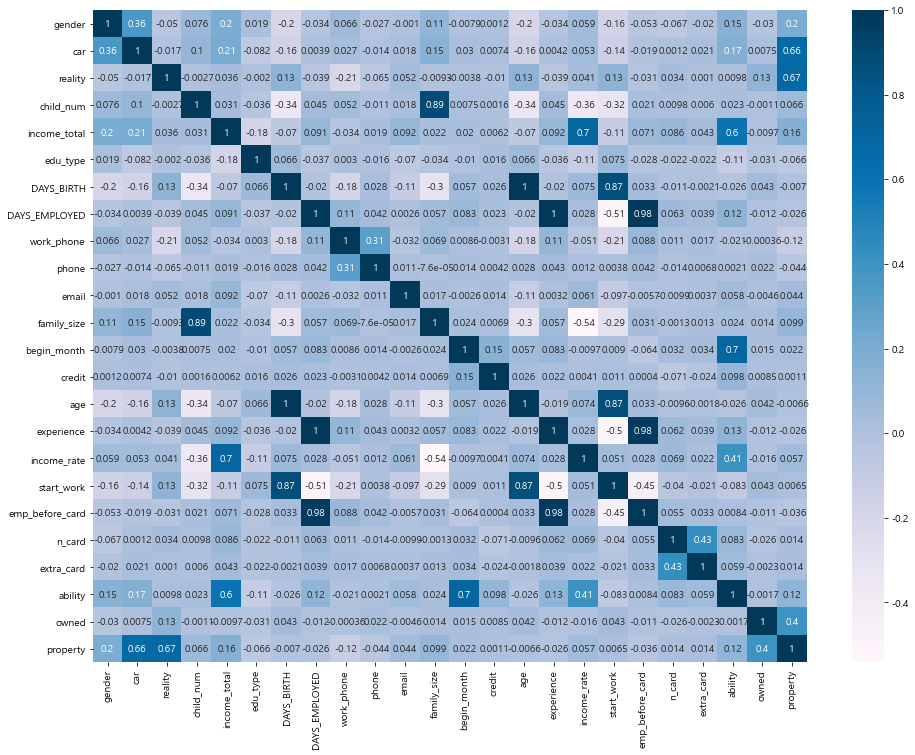

In [106]:
tr_corr=train.corr()
colormap = plt.cm.PuBu
plt.figure(figsize=(16,12))
sns.heatmap(tr_corr,annot=True,cmap=colormap,linecolor='white')

다중 공선성 =>  DAYS_BIRTH ,DAYS_EMPLOYED , child_num 삭제 

In [107]:
train = train.drop(['DAYS_BIRTH'], axis=1)
train = train.drop(['DAYS_EMPLOYED'], axis=1)
train = train.drop(['child_num'], axis=1)
train = train.drop(['emp_before_card'], axis=1)

In [112]:
# test = test.drop(['DAYS_BIRTH'], axis=1)
# test = test.drop(['DAYS_EMPLOYED'], axis=1)
# test = test.drop(['child_num'], axis=1)
# test = test.drop(['emp_before_card'], axis=1)

In [110]:
test = test.drop(['emp_before_card'], axis=1)

In [114]:
train.shape

(26389, 27)

In [113]:
test.shape

(9977, 26)

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26389 entries, 0 to 26388
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        26389 non-null  int64   
 1   car           26389 non-null  int64   
 2   reality       26389 non-null  int64   
 3   income_total  26389 non-null  float64 
 4   income_type   26389 non-null  object  
 5   edu_type      26389 non-null  int64   
 6   family_type   26389 non-null  object  
 7   house_type    26389 non-null  object  
 8   work_phone    26389 non-null  int64   
 9   phone         26389 non-null  int64   
 10  email         26389 non-null  int64   
 11  occyp_type    26389 non-null  object  
 12  family_size   26389 non-null  float64 
 13  begin_month   26389 non-null  float64 
 14  credit        26389 non-null  float64 
 15  id            26389 non-null  object  
 16  age           26389 non-null  float64 
 17  experience    26389 non-null  float64 
 18  income

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9976
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        9977 non-null   int64   
 1   car           9977 non-null   int64   
 2   reality       9977 non-null   int64   
 3   income_total  9977 non-null   float64 
 4   income_type   9977 non-null   object  
 5   edu_type      9977 non-null   int64   
 6   family_type   9977 non-null   object  
 7   house_type    9977 non-null   object  
 8   work_phone    9977 non-null   int64   
 9   phone         9977 non-null   int64   
 10  email         9977 non-null   int64   
 11  occyp_type    9977 non-null   object  
 12  family_size   9977 non-null   float64 
 13  begin_month   9977 non-null   float64 
 14  id            9977 non-null   object  
 15  age           9977 non-null   float64 
 16  experience    9977 non-null   float64 
 17  income_rate   9977 non-null   float64 
 18  start_wo

#### (5) 

##### - 로그변환

C:\Users\seohyun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income_total', ylabel='Density'>

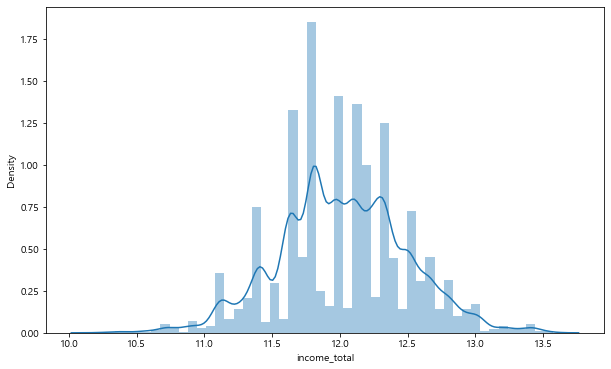

In [117]:
# income total
train["income_total"] = np.log1p(1 + train["income_total"])

f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train["income_total"])

In [118]:
# income total; test
test["income_total"] = np.log1p(1+test["income_total"])

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26389 entries, 0 to 26388
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        26389 non-null  int64   
 1   car           26389 non-null  int64   
 2   reality       26389 non-null  int64   
 3   income_total  26389 non-null  float64 
 4   income_type   26389 non-null  object  
 5   edu_type      26389 non-null  int64   
 6   family_type   26389 non-null  object  
 7   house_type    26389 non-null  object  
 8   work_phone    26389 non-null  int64   
 9   phone         26389 non-null  int64   
 10  email         26389 non-null  int64   
 11  occyp_type    26389 non-null  object  
 12  family_size   26389 non-null  float64 
 13  begin_month   26389 non-null  float64 
 14  credit        26389 non-null  float64 
 15  id            26389 non-null  object  
 16  age           26389 non-null  float64 
 17  experience    26389 non-null  float64 
 18  income

In [ ]:
# numerical = ['family_size', 'begin_month', 'age', 'experience', 'income_rate', 'start_work', 'emp_before_card', 'n_card', 'extra_card',
#                  'ability', 'property']

# categorical = ['income_type', 'family_type', 'house_type', 'occyp_type']

- Encoding categorical variable

In [ ]:
# # 같은 아이디에 같은 번호 부여

# le = LabelEncoder()
# train['id'] = le.fit_transform(train['id'])
# test['id'] = le.fit_transform(test['id']) 

In [ ]:
# le = OrdinalEncoder()

# train[categorical] = le.fit_transform(train[categorical])
# test[categorical] = le.transform(test[categorical]) # train[categorical_feat]을 기준으로 인코딩

In [ ]:
# train['income_abcd'] = train['income_abcd'].replace(['A','B','C','D'],[0,1,2,3])
# test['income_abcd'] = test['income_abcd'].replace(['A','B','C','D'],[0,1,2,3])

# train['begin_abcd'] = train['begin_abcd'].replace(['A','B','C','D'],[0,1,2,3])
# test['begin_abcd'] = test['begin_abcd'].replace(['A','B','C','D'],[0,1,2,3])

- numerical variables

In [ ]:
# scaler=MinMaxScaler()

# scaler.fit(train[numerical])
# train[numerical]=scaler.transform(train[numerical])

# scaler.fit(test[numerical])
# test[numerical]=scaler.transform(test[numerical])

In [119]:
train.to_csv('train_final.csv',header=True,index=False)
test.to_csv('test_final.csv',header=True,index=False)